<a href="https://colab.research.google.com/github/newmantic/Merton/blob/main/Merton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm

def distance_to_default(asset_value: float, debt_value: float, risk_free_rate: float, volatility: float, time: float) -> float:
    """
    Calculate the distance to default.

    Args:
    asset_value (float): Current value of the company's assets.
    debt_value (float): Value of the company's debt (default point).
    risk_free_rate (float): Risk-free interest rate.
    volatility (float): Volatility of the asset value.
    time (float): Time to maturity or time horizon.

    Returns:
    float: Distance to default.
    """
    numerator = np.log(asset_value / debt_value) + (risk_free_rate + 0.5 * volatility**2) * time
    denominator = volatility * np.sqrt(time)
    return numerator / denominator

def default_probability(asset_value: float, debt_value: float, risk_free_rate: float, volatility: float, time: float) -> float:
    """
    Calculate the default probability using the Merton model.

    Args:
    asset_value (float): Current value of the company's assets.
    debt_value (float): Value of the company's debt (default point).
    risk_free_rate (float): Risk-free interest rate.
    volatility (float): Volatility of the asset value.
    time (float): Time to maturity or time horizon.

    Returns:
    float: Default probability.
    """
    d2 = distance_to_default(asset_value, debt_value, risk_free_rate, volatility, time)
    return norm.cdf(-d2)

def simulate_asset_value(initial_value: float, mu: float, sigma: float, dt: float, time_horizon: float) -> np.ndarray:
    """
    Simulate the asset value using geometric Brownian motion.

    Args:
    initial_value (float): Initial value of the asset.
    mu (float): Drift rate of the asset value.
    sigma (float): Volatility of the asset value.
    dt (float): Time step for the simulation.
    time_horizon (float): Total time for the simulation.

    Returns:
    np.ndarray: Simulated asset values over time.
    """
    num_steps = int(time_horizon / dt)
    asset_values = np.zeros(num_steps)
    asset_values[0] = initial_value

    for t in range(1, num_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        asset_values[t] = asset_values[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

    return asset_values

Distance to Default: 1.1376
Default Probability: 0.1276
Simulated Asset Values: [1000.          986.53897751  966.91742701  950.3536745   959.7478092 ]...


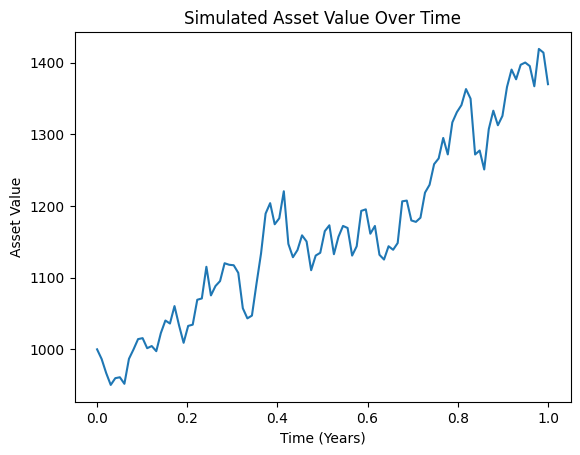

In [2]:
# Test case 1: Calculate Distance to Default
asset_value = 1000.0
debt_value = 800.0
risk_free_rate = 0.03
volatility = 0.25
time_horizon = 1.0  # 1 year
distance = distance_to_default(asset_value, debt_value, risk_free_rate, volatility, time_horizon)
print(f"Distance to Default: {distance:.4f}")  # Expected: A positive value representing distance to default

# Test case 2: Calculate Default Probability
default_prob = default_probability(asset_value, debt_value, risk_free_rate, volatility, time_horizon)
print(f"Default Probability: {default_prob:.4f}")  # Expected: A value between 0 and 1 representing the probability of default

# Test case 3: Simulate Asset Value Dynamics
initial_value = 1000.0
mu = 0.05  # Drift rate
sigma = 0.25  # Volatility
dt = 0.01  # Time step
time_horizon = 1.0  # 1 year
simulated_values = simulate_asset_value(initial_value, mu, sigma, dt, time_horizon)
print(f"Simulated Asset Values: {simulated_values[:5]}...")  # Expected: Array of simulated values over time

# Additional plot to visualize the simulation (optional)
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, time_horizon, len(simulated_values)), simulated_values)
plt.title("Simulated Asset Value Over Time")
plt.xlabel("Time (Years)")
plt.ylabel("Asset Value")
plt.show()